# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_data = []

print('Beginning Data Retrieval\n-----------------------------\n')

rcd = 0 
sets = 1
for city in cities:
    
    rcd += 1
    print(f'Processing Record {rcd} of Set {sets} | {city}')
    
    if rcd == 50:
        rcd = 0
        sets += 1
    
    query_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&clouds.value&units=imperial&appid={weather_api_key}"
    weather = requests.get(query_url).json()

    try:
        city_data.append({
            'City': city,
            'Lat': weather['coord']['lat'],
            'Lng': weather["coord"]['lon'],
            'Temp': weather["main"]["temp_max"],
            'Humidity': weather["main"]["humidity"],
            'Cloudiness': weather["clouds"]["all"],
            'Wind': weather["wind"]["speed"],
            'Country': weather["sys"]["country"],
            'Date': weather["dt"]
        })
    except:
        print('City not found. Skipping...')
        pass

print('-----------------------------\nData Retrieval Complete\n-----------------------------')

Beginning Data Retrieval
-----------------------------

Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | sobradinho
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | ponta delgada
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | cockburn town
Processing Record 12 of Set 1 | tela
Processing Record 13 of Set 1 | sandwick
Processing Record 14 of Set 1 | paris
Processing Record 15 of Set 1 | coihaique
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | almaznyy
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | darlowo
Processing Record 22 of Set 1 | nikolskoye
Processing R

Processing Record 40 of Set 4 | monrovia
Processing Record 41 of Set 4 | tanabe
Processing Record 42 of Set 4 | knysna
Processing Record 43 of Set 4 | zyryanka
Processing Record 44 of Set 4 | alexandria
Processing Record 45 of Set 4 | tigzirt
Processing Record 46 of Set 4 | chokurdakh
Processing Record 47 of Set 4 | baghdad
Processing Record 48 of Set 4 | tura
Processing Record 49 of Set 4 | labuan
Processing Record 50 of Set 4 | hasaki
Processing Record 1 of Set 5 | mount gambier
Processing Record 2 of Set 5 | berlevag
Processing Record 3 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 5 | mogadishu
Processing Record 5 of Set 5 | khatanga
Processing Record 6 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 7 of Set 5 | port hedland
Processing Record 8 of Set 5 | woodward
Processing Record 9 of Set 5 | wuwei
Processing Record 10 of Set 5 | huarmey
Processing Record 11 of Set 5 | amazar
Processing Record 12 of Set 5 | kudahuvadhoo
Pro

Processing Record 33 of Set 8 | maniitsoq
Processing Record 34 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 35 of Set 8 | ixtapa
Processing Record 36 of Set 8 | bathsheba
Processing Record 37 of Set 8 | nemuro
Processing Record 38 of Set 8 | clydebank
Processing Record 39 of Set 8 | baykit
Processing Record 40 of Set 8 | sorvag
City not found. Skipping...
Processing Record 41 of Set 8 | eufaula
Processing Record 42 of Set 8 | wau
Processing Record 43 of Set 8 | lugovoy
Processing Record 44 of Set 8 | belmonte
Processing Record 45 of Set 8 | inongo
Processing Record 46 of Set 8 | kilindoni
Processing Record 47 of Set 8 | qinhuangdao
Processing Record 48 of Set 8 | portland
Processing Record 49 of Set 8 | galesong
Processing Record 50 of Set 8 | sao jose da coroa grande
Processing Record 1 of Set 9 | falun
Processing Record 2 of Set 9 | dubbo
Processing Record 3 of Set 9 | mantua
Processing Record 4 of Set 9 | san francisco
Processing Record 5 of Set 9 | vila velha
Pr

Processing Record 24 of Set 12 | sesheke
Processing Record 25 of Set 12 | merauke
Processing Record 26 of Set 12 | pontes e lacerda
Processing Record 27 of Set 12 | bam
Processing Record 28 of Set 12 | miguel calmon
Processing Record 29 of Set 12 | ongandjera
Processing Record 30 of Set 12 | port-gentil
Processing Record 31 of Set 12 | jerantut
Processing Record 32 of Set 12 | yeppoon
Processing Record 33 of Set 12 | manzhouli
Processing Record 34 of Set 12 | revda
Processing Record 35 of Set 12 | bulawayo
Processing Record 36 of Set 12 | neuquen
Processing Record 37 of Set 12 | salalah
Processing Record 38 of Set 12 | sioux lookout
Processing Record 39 of Set 12 | najran
Processing Record 40 of Set 12 | pedro ii
Processing Record 41 of Set 12 | sorong
Processing Record 42 of Set 12 | sakakah
Processing Record 43 of Set 12 | eregli
Processing Record 44 of Set 12 | road town
Processing Record 45 of Set 12 | limulunga
Processing Record 46 of Set 12 | mountain home
Processing Record 47 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# city_data.to_csv(output_data_file)
df = pd.DataFrame(city_data)
df.to_csv(output_data_file)
df

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind,Country,Date
0,hilo,19.7297,-155.0900,75.20,60,1,4.61,US,1612293749
1,carnarvon,-24.8667,113.6333,75.20,100,40,21.85,AU,1612293830
2,punta arenas,-53.1500,-70.9167,69.80,49,40,17.00,CL,1612293567
3,ushuaia,-54.8000,-68.3000,53.60,82,75,14.97,AR,1612293808
4,sobradinho,-12.8333,-39.1000,84.02,63,55,9.44,BR,1612293830
...,...,...,...,...,...,...,...,...,...
587,ramjibanpur,22.8333,87.6167,55.22,43,0,3.40,IN,1612293902
588,mansa,29.9833,75.3833,56.46,39,0,6.08,IN,1612293902
589,ipixuna,-1.7625,-48.8043,89.60,58,75,10.36,BR,1612293902
590,san juan,-31.5375,-68.5364,73.40,33,93,11.59,AR,1612293769


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
df.describe()

,Lat,Lng,Temp,Humidity,Cloudiness,Wind,Date
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,5.920000e+02
mean,20.483597,23.604847,49.217838,73.854730,52.491554,8.663598,1.612294e+09
std,34.081330,89.655736,33.398342,19.679217,41.261002,6.291090,6.547820e+01
min,-54.800000,-179.166700,-42.740000,12.000000,0.000000,0.090000,1.612294e+09
25%,-8.141900,-55.152900,26.817500,64.000000,1.000000,3.885000,1.612294e+09
50%,25.549050,27.003850,59.710000,79.000000,61.500000,6.910000,1.612294e+09
75%,50.003725,102.680900,77.170000,88.000000,96.250000,11.522500,1.612294e+09
max,78.218600,179.316700,96.800000,100.000000,100.000000,43.660000,1.612294e+09


In [12]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

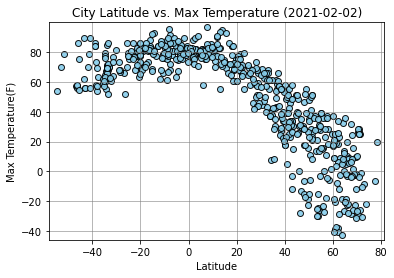

In [36]:
plt.scatter(df["Lat"], df["Temp"], marker="o", facecolors="skyblue", edgecolors="black", alpha=0.90)

curr_date = pd.to_datetime('today').date()

plt.xlim(df["Lat"].min()-3, df["Lat"].max()+3)
plt.ylim(df["Temp"].min()-3, df["Temp"].max()+3)

plt.title(f"City Latitude vs. Max Temperature ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)

## Latitude vs. Humidity Plot

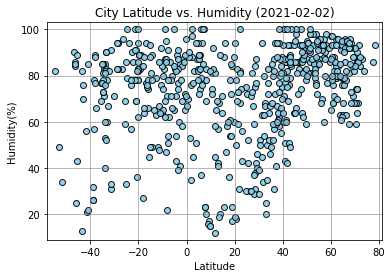

In [37]:
plt.scatter(df["Lat"], df["Humidity"], marker="o", facecolors="skyblue", edgecolors="black", alpha=0.90)

plt.xlim(df["Lat"].min()-3, df["Lat"].max()+3)
plt.ylim(df["Humidity"].min()-3, df["Humidity"].max()+3)

plt.title(f"City Latitude vs. Humidity ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)

## Latitude vs. Cloudiness Plot

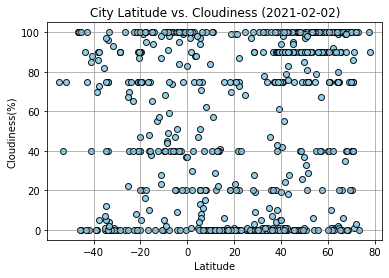

In [39]:
plt.scatter(df["Lat"], df["Cloudiness"], marker="o", facecolors="skyblue", edgecolors="black", alpha=0.90)

plt.xlim(df["Lat"].min()-5, df["Lat"].max()+5)
plt.ylim(df["Cloudiness"].min()-5, df["Cloudiness"].max()+5)

plt.title(f"City Latitude vs. Cloudiness ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)

## Latitude vs. Wind Speed Plot

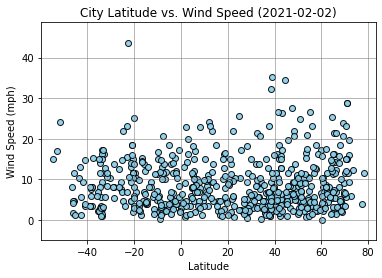

In [40]:
plt.scatter(df["Lat"], df["Wind"], marker="o", facecolors="skyblue", edgecolors="black", alpha=0.90)

plt.xlim(df["Lat"].min()-5, df["Lat"].max()+5)
plt.ylim(df["Wind"].min()-5, df["Wind"].max()+5)

plt.title(f"City Latitude vs. Wind Speed ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)

## Linear Regression

In [131]:
north_hem_df = df.loc[df["Lat"] >0]
south_hem_df = df.loc[df["Lat"] <0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

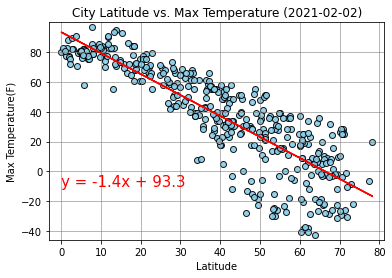

In [166]:
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="skyblue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,-10), fontsize=15,color="red")

plt.xlim(x_values.min()-3, x_values.max()+3)
plt.ylim(y_values.min()-3, y_values.max()+3)

plt.title(f"City Latitude vs. Max Temperature ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)

# print(f'the r value is: {rvalue}')
# correlation = st.pearsonr(y_values,x_values)
# print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

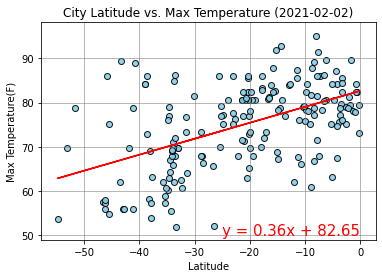

In [165]:
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="skyblue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r")

plt.annotate(line_eq,(-25,50),fontsize=15,color="red")

plt.xlim(x_values.min()-3, x_values.max()+3)
plt.ylim(y_values.min()-3, y_values.max()+3)

plt.title(f"City Latitude vs. Max Temperature ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)

# print(f'the r value is: {rvalue}')
# correlation = st.pearsonr(y_values,x_values)
# print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

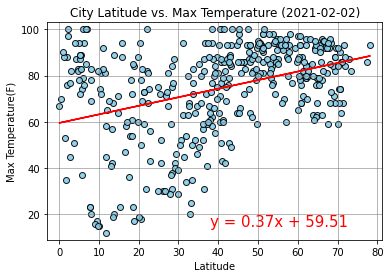

In [167]:
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="skyblue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(38,15), fontsize=15,color="red")

plt.xlim(x_values.min()-3, x_values.max()+3)
plt.ylim(y_values.min()-3, y_values.max()+3)

plt.title(f"City Latitude vs. Max Temperature ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)

# print(f'the r value is: {rvalue}')
# correlation = st.pearsonr(y_values,x_values)
# print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

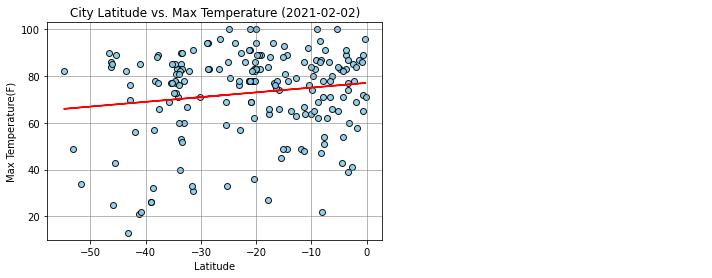

In [168]:
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="skyblue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(38,15), fontsize=15,color="red")

plt.xlim(x_values.min()-3, x_values.max()+3)
plt.ylim(y_values.min()-3, y_values.max()+3)

plt.title(f"City Latitude vs. Max Temperature ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)

# print(f'the r value is: {rvalue}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


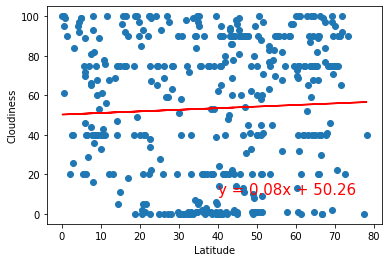

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


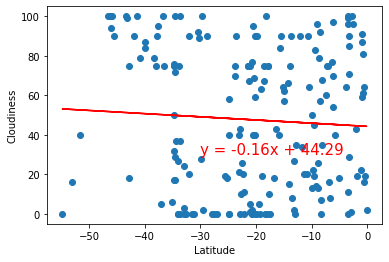

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


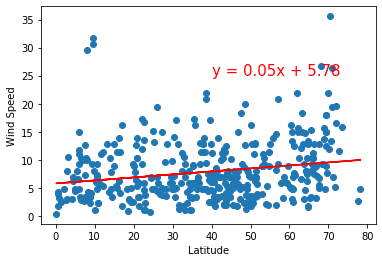

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


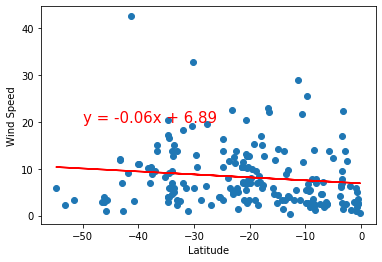